现在开始训练纯神经网络NN：

Epoch 00001: loss improved from inf to 0.12175, saving model to ./onlymlp\cp.ckpt

Epoch 00002: loss improved from 0.12175 to 0.02991, saving model to ./onlymlp\cp.ckpt

Epoch 00003: loss improved from 0.02991 to 0.00550, saving model to ./onlymlp\cp.ckpt

Epoch 00004: loss improved from 0.00550 to 0.00114, saving model to ./onlymlp\cp.ckpt

Epoch 00005: loss improved from 0.00114 to 0.00053, saving model to ./onlymlp\cp.ckpt

Epoch 00006: loss improved from 0.00053 to 0.00032, saving model to ./onlymlp\cp.ckpt

Epoch 00007: loss improved from 0.00032 to 0.00022, saving model to ./onlymlp\cp.ckpt

Epoch 00008: loss improved from 0.00022 to 0.00015, saving model to ./onlymlp\cp.ckpt

Epoch 00009: loss improved from 0.00015 to 0.00012, saving model to ./onlymlp\cp.ckpt

Epoch 00010: loss improved from 0.00012 to 0.00011, saving model to ./onlymlp\cp.ckpt

Epoch 00011: loss improved from 0.00011 to 0.00008, saving model to ./onlymlp\cp.ckpt

Epoch 00012: loss improved from

D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\study\anaconda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_

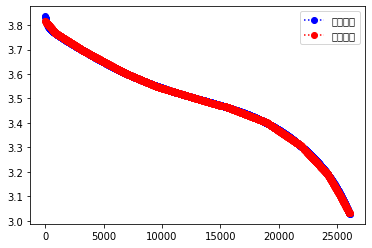

平均绝对误差为: 0.001820969948401818
模型的结构如下:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_12 (ModuleWra (None, 10)                20        
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 10)                110       
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 10)                110       
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 10)                110       
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 10)                110       
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________

In [3]:
#此程序为NN与PINN的对比试验
#第一步：训练NN模型（用于型号数据）
import math
import tensorflow as tf
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.ops import gen_math_ops, array_ops
from tensorflow import reshape
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%run loaddata2.ipynb
import keras

from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
print('现在开始训练纯神经网络NN：')

model2 = keras.Sequential([
layers.Dense(10,name='MLP1',activation='relu'),
layers.Dense(10, name='MLP2',activation='relu'),
layers.Dense(10, name='MLP3',activation='relu'),
layers.Dense(10, name='MLP4',activation='relu'),
layers.Dense(10, name='MLP5',activation='relu'),
layers.Dense(1, name='MLP6')])

x,y=load_data9(1)

jmdDir = "./onlymlp"
weight_path = jmdDir + "/cp.ckpt"

model2.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['mae'])
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_path, monitor='loss',
                                                         verbose=1,save_best_only=True,
                                                         mode='min',save_weights_only=True)
callbacks_list = [ModelCheckpoint]
history = model2.fit(x, y,epochs=80,verbose=0,callbacks=callbacks_list)
print('训练结束。模型训练结果请见下图：')
y1 = model2(np.array(x))
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
x=(x+1)/2*26843
errAfter = abs(y - y1)
plt.plot(x,y, 'ob:',label='real')
plt.plot(x,y1, 'or:',label='NN')
plt.legend()
plt.show()
print("平均绝对误差为:", mean_absolute_error(y,y1))
np.set_printoptions(threshold=1000)
print('模型的结构如下:')
model2.summary()
#print('模型的参数训练结果为:')
#print(model2.trainable_variables)

Epoch 1/300
82/82 [==============================] - 1s 1ms/step - loss: 0.0301 - mae: 0.1045

Epoch 00001: loss improved from inf to 0.03009, saving model to ./onlymlp\cp.ckpt
Epoch 2/300
82/82 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0231

Epoch 00002: loss improved from 0.03009 to 0.00102, saving model to ./onlymlp\cp.ckpt
Epoch 3/300
82/82 [==============================] - 0s 1ms/step - loss: 8.2272e-04 - mae: 0.0219

Epoch 00003: loss improved from 0.00102 to 0.00082, saving model to ./onlymlp\cp.ckpt
Epoch 4/300
82/82 [==============================] - 0s 1ms/step - loss: 3.7107e-04 - mae: 0.0147

Epoch 00004: loss improved from 0.00082 to 0.00037, saving model to ./onlymlp\cp.ckpt
Epoch 5/300
82/82 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0261

Epoch 00005: loss did not improve from 0.00037
Epoch 6/300
82/82 [==============================] - 0s 1ms/step - loss: 9.3038e-04 - mae: 0.0224

Epoch 00006: loss did not impro

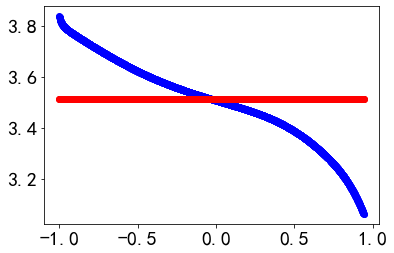

In [ ]:
#用于与PINN对比,这是用cycle0训练的初始数据
import math
import tensorflow as tf
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.ops import gen_math_ops, array_ops
from tensorflow import reshape
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%run loaddata2.ipynb
import keras

from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape


model2 = keras.Sequential([
layers.Dense(10,input_shape=(None,1),name='MLP1',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.81378984, -1.8503761 , -0.26157856, -1.1937139 ,  1.7237109 ,
         0.09220833,  1.4416839 ,  0.14427362,  1.2345102 ,  0.07999431 ]]),
              bias_initializer=tf.keras.initializers.constant([-0.888477  , -0.4108416 , -0.2635065 , -0.903354  , -0.7844031 ,
       -0.12960482,  0.3194202 , -0.15110472,  0.0354992 , -0.09203645 ])) ,
layers.Dense(10, name='MLP2',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[2.65422463e-01, -1.27041236e-01,  4.52661276e-01,
        -3.29471767e-01,  1.11165857e+00, -1.98310360e-01,
        -1.23113282e-01,  4.81187463e-01,  3.24396700e-01,
         7.72234499e-02],
       [ 6.95701595e-03, -2.68551898e+00, -1.72573641e-01,
        -1.60161126e+00,  1.67411542e+00, -4.11234468e-01,
        -1.51124140e-02,  9.16841507e-01, -3.64710361e-01,
        -3.13260704e-01],
       [-3.26450884e-01, -3.37707192e-01,  3.25038314e-01,
        -3.26060325e-01, -5.47694266e-02,  2.43076250e-01,
        -5.59946239e-01,  5.84894598e-01, -8.95260721e-02,
         3.85180980e-01],
       [-1.05172157e-01, -7.01109052e-01, -3.06323051e-01,
         1.05624102e-01,  9.20509815e-01, -2.77582556e-01,
        -7.68077910e-01,  1.19687915e+00,  1.91779554e-01,
        -2.01685891e-01],
       [-1.94546953e-01,  1.77171099e+00, -6.58261895e-01,
         1.04545212e+00, -1.45300135e-01, -7.86036730e-01,
        -3.49757075e-01,  2.24325728e+00,  3.32891941e-04,
        -4.64577675e-01],
       [ 2.27816492e-01,  5.46442755e-02, -3.02016944e-01,
        -8.67724139e-03, -6.43313289e-01, -2.49221534e-01,
        -6.73341751e-02, -3.15012604e-01,  4.21645045e-01,
        -7.12993145e-02],
       [ 1.54087424e-01,  8.40856135e-01, -1.04970299e-01,
         9.64941084e-01, -3.46117824e-01,  1.57958657e-01,
         3.05982232e-01, -1.40251651e-01, -2.58496910e-01,
        -1.74660590e-02],
       [-5.32724500e-01,  2.70515233e-01,  4.42903638e-02,
         1.88674312e-02, -4.20677811e-02, -6.76956773e-01,
         2.26448983e-01, -2.22733840e-01,  2.78927624e-01,
        -5.00703633e-01],
       [-3.54126781e-01,  7.53291428e-01,  1.43839791e-01,
         8.35071087e-01,  3.24644834e-01, -1.78450823e-01,
        -4.97348368e-01,  7.10153058e-02, -5.45599878e-01,
        -4.28441226e-01],
       [ 4.36499506e-01,  1.29668549e-01,  2.58011580e-01,
        -5.66761289e-03, -6.72495887e-02, -5.69603682e-01,
        -3.28735039e-02, -6.22254387e-02, -1.23597816e-01,
        -4.74325299e-01 ] ]),
              bias_initializer=tf.keras.initializers.constant([-0.04821535,  0.0083283 , -0.08613465,  0.21188577, -0.22363707,
       -0.07900284, -0.2996594 , -1.2863969 , -0.06285694, -0.33686188] ) ),
layers.Dense(10, name='MLP3',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.37891844, -0.49358854, -0.3003814 , -0.00569001, -0.50330913,
        -0.13192394,  0.2088368 , -0.6165178 , -0.14107676,  0.01025125],
       [-0.16690971, -0.0385198 , -0.15828466, -0.11662605, -0.13316566,
         0.02586474, -0.2702447 , -0.2953296 , -0.30750096,  0.69533265],
       [ 0.1286065 , -0.11082339, -0.16675779, -0.5077344 , -0.4005906 ,
        -0.68980557,  0.27726698,  0.33213943,  0.15943344, -0.11523914],
       [ 0.15191704, -0.06985731, -1.0449134 , -0.08227582, -0.24671364,
        -0.55191875, -0.33755833,  0.04693403,  0.21519306,  0.6278719 ],
       [-0.02409043, -0.43792608,  1.0708774 , -0.30255625, -0.2498283 ,
        -0.05430786, -0.18399584, -1.013597  , -0.36124596, -0.6258835 ],
       [-0.27315322,  0.13890049, -0.2731925 ,  0.02014232,  0.15771502,
         0.01904913, -0.25443736,  0.4412189 ,  0.43114555, -0.00876254],
       [ 0.39760613,  0.3669824 , -0.25505087, -0.35657358,  0.33956677,
         0.79111224, -0.33838248,  0.2781069 , -0.277354  , -0.33786467],
       [-0.64984614,  0.49701896,  0.5315713 ,  0.3447873 , -0.13050878,
         0.04216307, -0.01361138, -0.50849354,  0.14061783,  0.5302903 ],
       [-0.39075553,  0.48199713,  0.06720921, -0.04393947,  0.257868  ,
        -0.12013987, -0.08146083,  0.11790187, -0.026393  , -0.22349498],
       [ 0.05492723, -0.02429605, -0.00330691, -0.36589146,  0.02806997,
        -0.16752711, -0.3392403 , -0.16610305, -0.16872872, -0.3170745 ]]),
              bias_initializer=tf.keras.initializers.constant([-0.3664165 , -0.20090523, -0.1269268 , -0.4825628 , -0.35996747,
       -0.512396  ,  0.        , -0.01295314, -0.14460102,  0.07018897 ] ) ),
layers.Dense(10,name='MLP4',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-2.79809237e-02, -4.39540178e-01, -2.44521171e-01,
         2.22087592e-01,  1.50933072e-01,  9.26317051e-02,
        -2.00158060e-01, -4.58130002e-01,  2.95873344e-01,
        -2.48969391e-01],
       [-1.50837153e-01,  4.09051389e-01,  1.94640189e-01,
        -2.31450394e-01, -3.17534000e-01, -2.29275435e-01,
        -5.33144236e-01,  2.86021441e-01,  1.64142907e-01,
         5.43648452e-02],
       [ 8.36630389e-02,  7.00935423e-01,  2.12640926e-01,
        -9.34139937e-02, -1.35934548e-02,  8.57726991e-01,
        -5.20412445e-01, -1.41582415e-01,  6.84211552e-02,
        -1.01144695e+00],
       [ 4.84835058e-01,  1.21539757e-04,  3.36528033e-01,
         1.55718625e-01,  3.06059211e-01,  9.04734671e-01,
        -3.07767898e-01,  1.93653181e-02,  3.40583324e-01,
        -1.09506488e-01],
       [ 2.75329947e-02, -2.18189791e-01, -6.09867275e-02,
         1.13330275e-01,  1.88122034e-01, -3.09002608e-01,
        -4.07197654e-01,  2.66020268e-01, -3.54468286e-01,
        -2.70834804e-01],
       [-9.75600164e-03,  3.05007491e-02,  2.80703127e-01,
         2.16006190e-01, -1.43260568e-01, -1.36660472e-01,
         7.70067573e-02,  4.12402302e-01,  2.06297040e-01,
        -8.90916064e-02],
       [-4.24151003e-01,  1.51204884e-01,  2.23897696e-01,
        -5.19556999e-01, -5.47590971e-01,  7.58175254e-02,
         5.37978172e-01,  2.02502549e-01, -2.84241796e-01,
         2.78558373e-01],
       [-3.59926343e-01, -1.59636706e-01, -4.23954815e-01,
         2.03625821e-02,  3.93948928e-02, -1.12200901e-01,
         2.23679930e-01, -5.06743848e-01, -3.51578981e-01,
        -2.67414823e-02],
       [-3.42407972e-01, -1.24840163e-01,  5.03799856e-01,
         1.03137746e-01,  1.89573318e-01, -1.36372328e-01,
        -4.20136362e-01, -4.95751768e-01, -2.62023300e-01,
        -1.98928639e-01],
       [-2.71414220e-02, -1.79680839e-01,  3.54546487e-01,
         4.22073044e-02, -2.95825213e-01, -6.77095354e-01,
        -1.96686816e+00, -1.55480951e-01, -8.15897822e-01,
         6.21818304e-01]]),
              bias_initializer=tf.keras.initializers.constant([-2.5323722e-01, -5.3174579e-01, -1.1422616e+00, -2.5057191e-01,
       -4.4753474e-01,  3.6228839e-01, -3.8793954e-04, -6.3848370e-01,
       -2.3412429e-01,  2.0942633e-04  ])),
layers.Dense(10,name='MLP5',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.55930215, -0.42395222,  0.57775015,  0.22310124, -0.12673524,
         0.15844001,  0.09343132, -0.31311208, -0.09185239,  0.23238292],
       [-0.3077209 ,  0.28374428, -1.9871128 ,  0.29858577,  0.33853298,
        -0.05783666,  0.27010322,  0.1356535 , -0.43028197, -0.15311325],
       [-1.2252562 ,  0.4752189 ,  0.34037974, -0.39672935, -0.1920726 ,
        -0.41553307,  0.39073038, -0.63374144,  0.35702658, -0.49460354],
       [ 0.3282492 ,  0.22808532,  0.08905707, -0.1602418 , -0.479924  ,
        -0.17117023, -0.35756573, -0.35328692,  0.08075782, -0.19270127],
       [-0.3857901 , -0.2780655 , -0.19846283,  0.10122564,  0.30246323,
        -0.5634628 ,  0.2811154 , -0.5808906 ,  0.27963826,  0.6968276 ],
       [-0.29226035, -0.4564476 , -0.11949975,  0.60742426, -0.5512995 ,
         0.23557918, -0.5148516 , -0.2485227 ,  0.03042041, -0.18247432],
       [-0.13129295, -0.15905507,  0.2883185 ,  0.25775513,  0.20662178,
        -0.17057125, -0.3603145 ,  0.1910369 ,  0.27252313, -0.3143381 ],
       [-0.10538676, -0.26184934, -0.36741942,  0.03510941,  0.19848548,
         0.32129234,  0.62473047, -0.0075302 , -0.3344901 ,  0.5155041 ],
       [ 0.0794729 , -0.56301916, -0.11961404, -0.01312226,  0.07135432,
         0.36126167,  0.19913624, -0.47039407, -0.54252374,  0.07391509],
       [-0.1974759 , -0.26318407,  0.5592165 , -0.28926572, -0.12443197,
        -0.11298063, -0.7230814 ,  0.11956073, -0.5455087 , -0.20282583 ]]),
              bias_initializer=tf.keras.initializers.constant([0.02406061, -0.04865239,  0.11907359,  0.35612154, -0.61189634,
       -0.6209073 ,  0.0326091 , -0.28735226, -0.10505699,  0.0059619 ])) ,
layers.Dense(1,name='MLP6', kernel_initializer=tf.keras.initializers.constant([[-0.00158347],
       [-0.3295886 ],
       [-0.28909886],
       [ 0.34580392],
       [-0.238162  ],
       [-0.06701415],
       [-0.02859797],
       [ 0.01671782],
       [-0.05230766],
       [ 0.20372626]]),
              bias_initializer=tf.keras.initializers.constant([0.2130326]))])



x,y=load_data9(2)

jmdDir = "./onlymlp"
weight_path = jmdDir + "/cp.ckpt"

model2.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(1e-1), metrics=['mae'])
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_path, monitor='loss',
                                                         verbose=1,save_best_only=True,
                                                         mode='min',save_weights_only=True)
callbacks_list = [ModelCheckpoint]
history = model2.fit(x, y,epochs=300,verbose=1,callbacks=callbacks_list)
y1 = model2(np.array(x))
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter = abs(y - y1)
print("mean_absolute_error:", mean_absolute_error(y,y1))
plt.plot(x,y, 'ob:')
plt.plot(x,y1, 'or:')
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
%run loaddata2.ipynb
%run mymodel.ipynb
if __name__ == "__main__":
# --------------------------------------------------------------------------
    myDtype = 'float32'
    inti_data=np.asarray([3.3029034,0.9065826 , 1.2042501 , 5.2634254 , 0.0617640, 0, 0 ,0.94])
    #R0  = 0.1;   #R1  = 0.01;  #R2  = 0.1 # Ω
    #C1  = 160 F     #C2  = 3000F
    #U1_0 = 0.006 V      #U2_0 = 0.06V     #SOC_0 = 0.95  #最大为1 
# --------------------------------------------------------------------------
    # load battery data
    batch_size=1
    ds_train = load_data1(2)#re-train
    x_train=[];y_train=[]
    for item in ds_train:
        x_train=item['x']
        y_train=item['y']
    #print(x_train.shape)
    #print(y_train.shape)
#--------------------------------------------------------------------------
    model = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
    # create_PINN在model中
    EPOCHS=500
    jmdDir = "./training_points2"
    weight_path = jmdDir + "/cp.ckpt"
    ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_path, monitor='loss',
                                                         verbose=1,save_best_only=True,
                                                         mode='min',save_weights_only=True)
    callbacks_list = [ModelCheckpoint]
    tensorboard= tf.keras.callbacks.TensorBoard(log_dir="./logs",histogram_freq=True,write_graph=True,
        write_grads=True)
    history = model.fit(x_train, y_train,  batch_size= batch_size,epochs=EPOCHS,
                            verbose=1,callbacks=callbacks_list)
    #history = PINNmodel.fit(x_train, y_train,  batch_size= batch_size,epochs=EPOCHS,
                            #validation_data=(x_valid,y_valid),
                            #verbose=1,callbacks=[tensorboard])
# --------------------------------------------------------------------------
    df = pd.DataFrame.from_dict(history.history)
    df.insert(loc=0, column='epoch', value=history.epoch)
    df.to_csv(jmdDir + "/lossHistory.csv", index=False)

Epoch 1/500
1/1 [==============================] - 8s 8s/step - loss: 1.8971e-04 - mae: 0.0136

Epoch 00001: loss improved from inf to 0.00019, saving model to ./training_points2\cp.ckpt
Epoch 2/500
1/1 [==============================] - 1s 522ms/step - loss: 9.3455e-06 - mae: 0.0025

Epoch 00002: loss improved from 0.00019 to 0.00001, saving model to ./training_points2\cp.ckpt
Epoch 3/500
1/1 [==============================] - 0s 487ms/step - loss: 1.0307e-04 - mae: 0.0096

Epoch 00003: loss did not improve from 0.00001
Epoch 4/500
1/1 [==============================] - 1s 603ms/step - loss: 1.0477e-04 - mae: 0.0097

Epoch 00004: loss did not improve from 0.00001
Epoch 5/500
1/1 [==============================] - 1s 512ms/step - loss: 3.9028e-05 - mae: 0.0056

Epoch 00005: loss did not improve from 0.00001
Epoch 6/500
1/1 [==============================] - 0s 488ms/step - loss: 5.4352e-06 - mae: 0.0019

Epoch 00006: loss improved from 0.00001 to 0.00001, saving model to ./training_poi

In [ ]:
#用-20℃的数据训练PINN模型
#用时：07-
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
%run loaddata2.ipynb
%run mymodel.ipynb
if __name__ == "__main__":
# --------------------------------------------------------------------------
    myDtype = 'float32'
    inti_data=np.asarray([3,0.9 , 1, 4, 6, 0, 0 ,0.94])
    #R0  = 0.1;   #R1  = 0.01;  #R2  = 0.1 # Ω
    #C1  = 160 F     #C2  = 3000F
    #U1_0 = 0.006 V      #U2_0 = 0.06V     #SOC_0 = 0.95  #最大为1 
# --------------------------------------------------------------------------
    # load battery data
    batch_size=1
    ds_train = load_data0(1)#2600个数据
    x_train=[];y_train=[]
    for item in ds_train:
        x_train=item['x']
        y_train=item['y']
    #print(x_train.shape)
    #print(y_train.shape)
#--------------------------------------------------------------------------
    model0 = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
    # create_PINN在model中
    EPOCHS=2400
    jmdDir = "./training_points0"
    weight_path = jmdDir + "/cp.ckpt"
    ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_path, monitor='loss',
                                                         verbose=1,save_best_only=True,
                                                         mode='min',save_weights_only=True)
    callbacks_list = [ModelCheckpoint]
    tensorboard= tf.keras.callbacks.TensorBoard(log_dir="./logs",histogram_freq=True,write_graph=True,
        write_grads=True)
    history = model0.fit(x_train, y_train,  batch_size= batch_size,epochs=EPOCHS)
    #history = PINNmodel.fit(x_train, y_train,  batch_size= batch_size,epochs=EPOCHS,
                            #validation_data=(x_valid,y_valid),
                            #verbose=1,callbacks=[tensorboard])
# --------------------------------------------------------------------------
    df = pd.DataFrame.from_dict(history.history)
    df.insert(loc=0, column='epoch', value=history.epoch)
    df.to_csv(jmdDir + "/lossHistory.csv", index=False)

Epoch 1/2400
1/1 [==============================] - 6s 6s/step - loss: 0.0457 - mae: 0.2136
Epoch 2/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0062 - mae: 0.0710
Epoch 3/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0059 - mae: 0.0598
Epoch 4/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0158 - mae: 0.1093
Epoch 5/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0174 - mae: 0.1176
Epoch 6/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0985
Epoch 7/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0072 - mae: 0.0659
Epoch 8/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0033 - mae: 0.0376
Epoch 9/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - mae: 0.0369
Epoch 10/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0034 - mae: 0.0557
Epoch 11/2400
1/1 [==============================] - 2s 2s/step - loss: 0.0053 

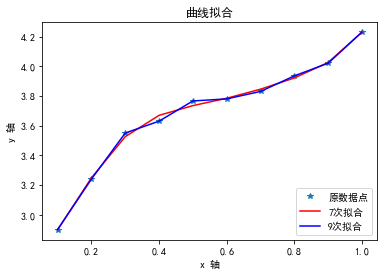

tf.Tensor(
[0.0000000e+00 1.0031293e+01 2.0062826e+01 ... 2.6050076e+04 2.6060107e+04
 2.6070139e+04], shape=(2600,), dtype=float32)
tf.Tensor([3.8316393 3.8283803 3.8256104 ... 3.0288143 3.0276735 3.026533 ], shape=(2600,), dtype=float32)
2601
[4.08866453 4.08815789 4.08765233 ... 3.30988569 3.30899214 3.30809765]
2600
theta: [[-0.23612536]
 [-0.23993921]
 [ 0.03191266]
 [ 0.03191266]
 [-0.03514283]
 [ 0.00461491]
 [ 0.00769945]
 [ 0.01050711]]


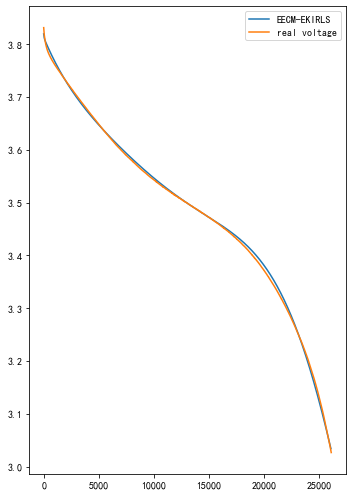

[3.81962915 3.81912575 3.81692167 ... 3.03581828 3.03492473 3.03403023]


In [2]:
#此段程序复现论文：An Enhanced Equivalent Circuit Model With Real-Time 
#Parameter Identification for Battery State-of-Charge Estimation

#首先用9次多项式拟合Uoc-SOV曲线

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False


# 源数据点的x,y坐标
x =  np.arange(1, 0, -0.1)
y = [4.23,4.02,3.935,3.83,3.78,3.766,3.63,3.55,3.24,2.9]

an = np.polyfit(x, y, 7)        # 7次多项式拟合还可以
an1 = np.polyfit(x, y, 9)        # 9次多项式拟合太丑了
# 如果源数据点不够要自己扩充，否则直接使用源数据点即可
x1 =  np.arange(1, 0, -0.1)  # 画曲线用的数据点
yvals = np.polyval(an, x1)      # 根据多项式系数计算拟合后的值
yvals1 = np.polyval(an1, x1)      # 根据多项式系数计算拟合后的值

# 画图
plt.plot(x, y, '*', label='原数据点')
plt.plot(x1, yvals, 'r', label='7次拟合')
plt.plot(x1, yvals1, 'b', label='9次拟合')
plt.xlabel('x 轴')
plt.ylabel('y 轴')
plt.legend(loc=4)               # 指定legend的位置
plt.title('曲线拟合')
plt.show()



#本段目的是，产生t和v。t是时间间隔，用于计算SOC；v是终端电压。
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
import xlrd

def load_data0(cycle):#用于与纯神经网络做对比：十分之一
    data = xlrd.open_workbook(r'502.xls')
    x=[];y=[];x_train=[];y_train=[]
    sheet=data.sheet_by_index(cycle)
    dx=sheet.col_values(4)
    dy=sheet.col_values(1)
    num=2600
    for i in range(num+1):
        x_train.append(dx[i*1])
        y_train.append(dy[i*1])
    #for j in range(len(x_train)-1): #计算时间差，共len-1个差
        #x_train[j]=x_train[j+1]-x_train[j]
    dx=np.array(x_train)
    dx=dx[0:2600]
    dx=dx[:,np.newaxis]
    dy=y_train[1:num+1]
    dy=np.array(dy)
    dy=dy[:,np.newaxis]
    x.append(dx)
    y.append(dy)
    def generator():
        for xx,yy in zip(x,y):
            yield {'x':xx, 'y':yy}
    dataset=tf.data.Dataset.from_generator(generator=generator, 
                                           output_types={'x':tf.float32,'y':tf.float32})
    ds_train = dataset.padded_batch(1, padded_shapes={'x':[None,1], 'y':[None,1]})
    return ds_train
ds_train = load_data0(1)
for item in ds_train:
    t0=item['x'][0,:,0]
    v0=item['y'][0,:,0]
    print(t0)
    print(v0)
v=[]
v.append(0)
t=[]
for i in range(2600):
    v.append(v0[i].numpy())
    t.append(t0[i].numpy())
print(len(v))



#本段要计算SOC以及对应的Uoc，Vf=v-Uoc
#输入：v,t（总时间，不是间隔）  输出：vf
#SOC安时积分法用的直接是10
#vf=Uoc-v 需要用到上段的v
SOC=[]
SOC.append(0.94)
I=5
for k in range(1,2600):
    SOC.append(SOC[k-1]-1*10*I/50/3600)
Uoc=np.polyval(an,SOC)      # 根据多项式系数计算拟合后的值
print(Uoc)
print(len(Uoc))
vf=Uoc-v[1:]
"""
print(vf)

plt.plot(vf,label='vf')
plt.legend()
plt.show()

plt.plot(Uoc,label='Uoc')
plt.legend()
plt.show()

plt.plot(v[1:],label='v')
plt.legend()
plt.show()
"""



#时间差都是10s
#i也不变，i=5A
import numpy as np
#-----------------初始化----------------
I=5
P=[]
P.append(10*np.eye(8))
theta=[]
theta.append(np.zeros((8,1)))
r=[]
#r.append(np.zeros((8,1)))#r(0)
r.append(np.array([[0],[0],[I],[0],[0],[0],[0],[0]]))#r(1)
r.append(np.array([[vf[0]],[0],[I],[I],[0],[0],[0],[0]]))
x=[]
x.append(np.array([0]))#x(0)
x.append(np.array([0]))#x(1)
#----------------------------------------
for k in range(1,2600):
    if k==2:
        x.append((theta[k-1][2]+theta[k-1][3]+theta[k-1][4])*I)
    if k>2:
        x.append(-1*theta[k-1][0]*x[k-2]-theta[k-1][1]*x[k-3]+(theta[k-1][2]+theta[k-1][3]+theta[k-1][4])*I)
    if k>=2:
        r.append(np.array([[-1*vf[k-1]],[-1*vf[k-2]],[I],[I],[I],x[k]**2,x[k-1]**2,x[k-2]**2]))
    #print('-------------------------------')
    K=(P[k-1].dot(r[k]))/(1+(r[k].transpose().dot(P[k-1])).dot(r[k]))
    theta.append(theta[k-1]+K.dot(vf[k]-(r[k].transpose()).dot(theta[k-1])))
    P.append((np.eye(8)-K.dot(r[k].transpose())).dot(P[k-1]))

print('theta:',theta[-1])
#————————————————————————————————————————
#______________________用辨识出来的模型，预估——————————————————-
#要计算SOC以及对应的Uoc，Vf=v-Uoc
a1=theta[-1][0]
a2=theta[-1][1]
b0=theta[-1][2]
b1=theta[-1][3]
b2=theta[-1][4]
y2=theta[-1][5]

ds_train = load_data0(1)
for item in ds_train:
    t11=item['x'][0,:,0]
    v11=item['y'][0,:,0]
v1=[]
v1.append(0)
for i in range(2600):
    v1.append(v11[i].numpy())

SOC=[]
SOC.append(0.94)
for k in range(1,2600):
    SOC.append(SOC[k-1]-1*10*I/50/3600)
Uoc1=np.polyval(an,SOC)      # 根据多项式系数计算拟合后的值

x1=[]
vf1=[]
x1.append(0.26)#x(0)
x1.append(0.26)#x(1)
x1.append(0.26)
for k in range(3,2600):
    x1.append(-1*a1*x1[k-2]-a2*x1[k-3]+(b0+b1+b2)*I)
    vf1.append(x1[k]+y2*x1[k]*x1[k])

v2=Uoc1[3:]-np.array(vf1)[:,0]
fig=plt.figure(num=1,figsize=(5,7),tight_layout=True)
plt.plot(t[:-3],v2,label='EECM-EKIRLS')
plt.plot(t,v[1:],label='real voltage')
plt.legend()
plt.show()
print(v2)

In [1]:
# --------训练结果对比图---------------------------------------------------------
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from math import sqrt
import matplotlib as matplotlib 
import matplotlib.gridspec as gridspec
from tensorflow.keras.callbacks import TensorBoard
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib as matplotlib
import warnings
warnings.filterwarnings("ignore")
%run loaddata2.ipynb
%run mymodel.ipynb
#--------------------------------------------------------------------------
# preliminaries 8个参数
myDtype = 'float32'
inti_data=np.asarray([3,0.9 , 1, 4, 6, 0, 0 ,0.94])
#--------------------------------------------------------------------------
# load battery data
batch_size=1
cycle=1
ds_train=load_data8(cycle)
x_test=[];y_test=[]
for item in ds_train:
    x_test=item['x']
    y_test=item['y']
    
time=load_time8(cycle)

jmdDir0 = "./training_points0"
weight_path0 = jmdDir0 + "/cp.ckpt"#之前训练的

model0=create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
model0.load_weights(weight_path0)
voltage0 = model0.predict( x_test).transpose()
err0 = abs(y_test[0,:, 0] - voltage0[:,0])
PINNmae0= sqrt(mean_squared_error(y_test[0,:, 0],voltage0[:,0]))

x,y=load_data7(cycle)
x=np.array(x)
x =x[:,np.newaxis]
y1 = model2(x)
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter2 = abs(y - y1)
NNmae=sqrt(mean_squared_error(y,y1))
# --------------------------------------------------------------------------

print( "PINN, MAE=%1.1e" % (PINNmae0))
print ("NN, MAE=%1.1e" % (NNmae))

matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rc('font', size=16)
xLB = 0;xUB = 27000
yLB = 3.1;yUB =3.82
fig=plt.figure(num=1,figsize=(5,7),tight_layout=True)
fig.clf()

# 设置一个网格(grid)，行数为1，列数为2，宽度比例为3:1
gs = gridspec.GridSpec(nrows=2, ncols=1,  height_ratios=[3.1,1])
ax0 = fig.add_subplot(gs[0, 0])

str0 = "PINN"
str2 = "NN"
real = "Real voltage"

plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])

plt.plot(time, voltage0[:,0], 'r-',label=str0,linewidth=4)
plt.plot(time,y1, 'b--',label=str2 ,linewidth=3)
plt.plot(time[:-3],v2, 'g-.',label='EECM-EKIRLS',linewidth=3)
plt.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
plt.ylabel('Voltage(V)',fontsize=18,fontweight= 'medium')
plt.legend( facecolor='w',fontsize=15)
# --------------------------------------------------------------------------
# 增加第二个图
ax1 = fig.add_subplot(gs[1, 0])
xLB = 0;xUB = 27000
yLB = 0;yUB =0.02
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
matplotlib.rc('font', size=14)
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
e0=abs(voltage0[:,0]-y_test[0,:, 0])
e1=abs(y1[:,0]-y_test[0,:, 0])
e2=abs(v2-y_test[0,3:, 0])
plt.plot(time, e0, 'r-',label=str0,linewidth=1)
plt.plot(time,e1, 'b--',label="NN",linewidth=1)
plt.plot(time[3:],e2, 'g-.',label="'EECM-EKIRLS",linewidth=1)
plt.ylabel('Error(V)',fontsize=18,fontweight= 'medium')
plt.xlabel('Time(s)',fontsize=18,fontweight= 'medium')
plt.yticks(ticks=[0,0.02],labels=[0,0.02]) 
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.savefig('duibi-11.png', dpi=500, format='png')
plt.show()
# --------------------------------------------------------------------------

matplotlib.rcParams['mathtext.default'] = 'regular'

xLB = 20800;xUB = 21000
yLB = 3.33;yUB =3.36

fig=plt.figure(num=1,figsize=(3.5,3),tight_layout=True)
fig.clf()

matplotlib.rc('font', size=20)
ax = plt.axes()
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)

ax.plot(time, voltage0[:,0], 'r-',label=str0,linewidth=3)
ax.plot(time,y1, 'b-',label=str2 ,linewidth=3)
plt.plot(time[:-3],v2, 'g-.',label='EECM-EKIRLS',linewidth=3)
ax.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)

ax.set_xticks([20800,21000])
ax.set_yticks([3.33,3.36])
plt.savefig('duibi-111.png', dpi=500, format='png')
plt.show()

NameError: name 'model2' is not defined

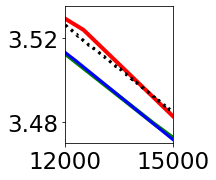

In [8]:
# --------------------------------------------------------------------------

matplotlib.rcParams['mathtext.default'] = 'regular'

xLB = 12000;xUB = 15000
yLB = 3.47;yUB =3.535

fig=plt.figure(num=1,figsize=(3.5,3),tight_layout=True)
fig.clf()

matplotlib.rc('font', size=23)
ax = plt.axes()
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
ax.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
ax.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
ax.plot(time,y1, 'b-',label=str2 ,linewidth=3)
ax.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
ax.set_xticks([12000,15000])
ax.set_yticks([3.48,3.52])
plt.savefig('duibi-222.png', dpi=500, format='png')
plt.show()

PINN after, MAE=3.6e-03
PINN before, MAE=1.7e-02
NN, MAE=1.4e-02


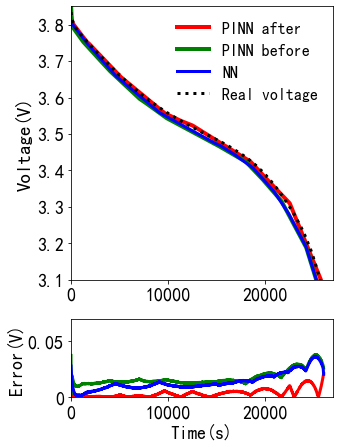

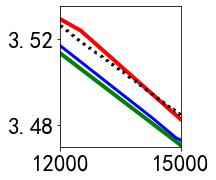

In [4]:
# --------对比2---------------------------------------------------------
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as matplotlib 
import matplotlib.gridspec as gridspec
from tensorflow.keras.callbacks import TensorBoard
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib as matplotlib
%run loaddata2.ipynb
%run mymodel.ipynb
#--------------------------------------------------------------------------
# preliminaries 8个参数
myDtype = 'float32'
inti_data=np.asarray([3.3029034,0.9065826 , 1.2042501 , 5.2634254 , 0.0617640, 0, 0 ,0.94])
#--------------------------------------------------------------------------
# load battery data
batch_size=1
cycle=2
ds_train=load_data8(cycle)
x_test=[];y_test=[]
for item in ds_train:
    x_test=item['x']
    y_test=item['y']
    
time=load_time8(cycle)
jmdDir = "./training_points2"
jmdDir0 = "./training_points0"
weight_path = jmdDir + "/cp.ckpt"
weight_path0 = jmdDir0 + "/cp.ckpt"#之前训练的

model0=create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
model0.load_weights(weight_path0)
voltage0 = model0.predict( x_test).transpose()
err0 = abs(y_test[0,:, 0] - voltage0[:,0])
PINNmae0= mean_absolute_error(y_test[0,:, 0],voltage0[:,0])

modelAfter = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
modelAfter.load_weights(weight_path)
voltageAfter = modelAfter.predict( x_test).transpose()
errAfter = abs(y_test[0,:, 0] - voltageAfter[:,0])
PINNmae= mean_absolute_error(y_test[0,:, 0],voltageAfter[:,0])
# --------------------------------------------------------------------------
#jmdDir2 = "./onlymlp"
#weight_path2 = jmdDir2 + "/cp.ckpt"
#model2.load_weights(weight_path2)

x,y=load_data7(cycle)
x=np.array(x)
x =x[:,np.newaxis]
y1 = model2(x)
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter2 = abs(y - y1)
NNmae=mean_absolute_error(y,y1)
# --------------------------------------------------------------------------
print( "PINN after, MAE=%1.1e" % (PINNmae))
print( "PINN before, MAE=%1.1e" % (PINNmae0))
print ("NN, MAE=%1.1e" % (NNmae))

matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rc('font', size=18)
xLB = 0;xUB = 27000
yLB = 3.1;yUB =3.85
fig=plt.figure(num=1,figsize=(5,6.5),tight_layout=True)
fig.clf()

# 设置一个网格(grid)，行数为1，列数为2，宽度比例为3:1
gs = gridspec.GridSpec(nrows=2, ncols=1,  height_ratios=[3.5,1])
ax0 = fig.add_subplot(gs[0, 0])

real = "Real voltage"
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
real = "Real voltage"

plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
plt.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
plt.plot(time,y1, 'b-',label=str2 ,linewidth=3)
plt.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
plt.ylabel('Voltage(V)',fontsize=19,fontweight= 'medium')
plt.legend( facecolor='w',fontsize=16,frameon=False,loc="upper right")
# --------------------------------------------------------------------------
# 增加第二个图
ax1 = fig.add_subplot(gs[1, 0])
xLB = 0;xUB = 27000
yLB = 0;yUB =0.07
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
matplotlib.rc('font', size=16)
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
eAf=abs(voltageAfter[:,0]-y_test[0,:, 0])
e0=abs(voltage0[:,0]-y_test[0,:, 0])
e1=abs(y1[:,0]-y_test[0,:, 0])
plt.plot(time,eAf, 'r-',label=strAfter,linewidth=3)
plt.plot(time, e0, 'g-',label=str0,linewidth=3)
plt.plot(time,e1, 'b-',label="NN",linewidth=3)
plt.ylabel('Error(V)',fontsize=18,fontweight= 'medium')
plt.xlabel('Time(s)',fontsize=18,fontweight= 'medium')
plt.yticks(ticks=[0,0.05],labels=[0,0.05]) 
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.savefig('duibi-22.png', dpi=500, format='png')
plt.show()
# --------------------------------------------------------------------------

matplotlib.rcParams['mathtext.default'] = 'regular'

xLB = 12000;xUB = 15000
yLB = 3.47;yUB =3.535

fig=plt.figure(num=1,figsize=(3.5,3),tight_layout=True)
fig.clf()

matplotlib.rc('font', size=23)
ax = plt.axes()
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
ax.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
ax.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
ax.plot(time,y1, 'b-',label=str2 ,linewidth=3)
ax.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
ax.set_xticks([12000,15000])
ax.set_yticks([3.48,3.52])
plt.savefig('duibi-222.png', dpi=500, format='png')
plt.show()

PINN after, MAE=6.4e-03
PINN before, MAE=2.5e-02
NN, MAE=2.2e-02


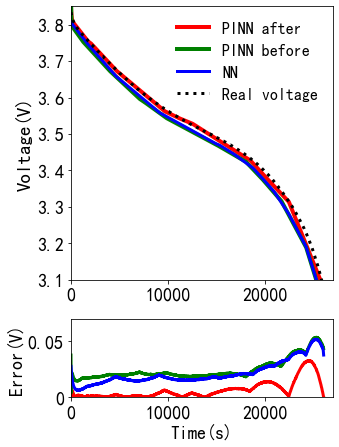

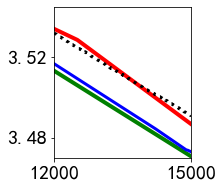

In [5]:
# --------对比3---------------------------------------------------------
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as matplotlib 
import matplotlib.gridspec as gridspec
from tensorflow.keras.callbacks import TensorBoard
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib as matplotlib
%run loaddata2.ipynb
%run mymodel.ipynb
#--------------------------------------------------------------------------
# preliminaries 8个参数
myDtype = 'float32'
inti_data=np.asarray([3.3029034,0.9065826 , 1.2042501 , 5.2634254 , 0.0617640, 0, 0 ,0.94])
#--------------------------------------------------------------------------
# load battery data
batch_size=1
cycle=3
ds_train=load_data8(cycle)
x_test=[];y_test=[]
for item in ds_train:
    x_test=item['x']
    y_test=item['y']
    
time=load_time8(cycle)
jmdDir = "./training_points3"
jmdDir0 = "./training_points0"
weight_path = jmdDir + "/cp.ckpt"
weight_path0 = jmdDir0 + "/cp.ckpt"#之前训练的

model0=create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
model0.load_weights(weight_path0)
voltage0 = model0.predict( x_test).transpose()
err0 = abs(y_test[0,:, 0] - voltage0[:,0])
PINNmae0= mean_absolute_error(y_test[0,:, 0],voltage0[:,0])

modelAfter = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
modelAfter.load_weights(weight_path)
voltageAfter = modelAfter.predict( x_test).transpose()
errAfter = abs(y_test[0,:, 0] - voltageAfter[:,0])
PINNmae= mean_absolute_error(y_test[0,:, 0],voltageAfter[:,0])
# --------------------------------------------------------------------------
#jmdDir2 = "./onlymlp"
#weight_path2 = jmdDir2 + "/cp.ckpt"
#model2.load_weights(weight_path2)

x,y=load_data7(cycle)
x=np.array(x)
x =x[:,np.newaxis]
y1 = model2(x)
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter2 = abs(y - y1)
NNmae=mean_absolute_error(y,y1)
# --------------------------------------------------------------------------
print( "PINN after, MAE=%1.1e" % (PINNmae))
print( "PINN before, MAE=%1.1e" % (PINNmae0))
print ("NN, MAE=%1.1e" % (NNmae))

matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rc('font', size=18)
xLB = 0;xUB = 27000
yLB = 3.1;yUB =3.85
fig=plt.figure(num=1,figsize=(5,6.5),tight_layout=True)
fig.clf()

# 设置一个网格(grid)，行数为1，列数为2，宽度比例为3:1
gs = gridspec.GridSpec(nrows=2, ncols=1,  height_ratios=[3.5,1])
ax0 = fig.add_subplot(gs[0, 0])

real = "Real voltage"
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
real = "Real voltage"

plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
plt.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
plt.plot(time,y1, 'b-',label=str2 ,linewidth=3)
plt.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
plt.ylabel('Voltage(V)',fontsize=19,fontweight= 'medium')
plt.legend( facecolor='w',fontsize=16,frameon=False,loc="upper right")
# --------------------------------------------------------------------------
# 增加第二个图
ax1 = fig.add_subplot(gs[1, 0])
xLB = 0;xUB = 27000
yLB = 0;yUB =0.07
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
matplotlib.rc('font', size=16)
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
eAf=abs(voltageAfter[:,0]-y_test[0,:, 0])
e0=abs(voltage0[:,0]-y_test[0,:, 0])
e1=abs(y1[:,0]-y_test[0,:, 0])
plt.plot(time,eAf, 'r-',label=strAfter,linewidth=3)
plt.plot(time, e0, 'g-',label=str0,linewidth=3)
plt.plot(time,e1, 'b-',label="NN",linewidth=3)
plt.ylabel('Error(V)',fontsize=18,fontweight= 'medium')
plt.xlabel('Time(s)',fontsize=18,fontweight= 'medium')
plt.yticks(ticks=[0,0.05],labels=[0,0.05]) 
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.savefig('duibi-33.png', dpi=500, format='png')
plt.show()
# --------------------------------------------------------------------------

matplotlib.rcParams['mathtext.default'] = 'regular'

xLB = 12000;xUB = 15000
yLB = 3.47;yUB =3.545

fig=plt.figure(num=1,figsize=(3.5,3),tight_layout=True)
fig.clf()

matplotlib.rc('font', size=20)
ax = plt.axes()
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
ax.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
ax.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
ax.plot(time,y1, 'b-',label=str2 ,linewidth=3)
ax.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
ax.set_xticks([12000,15000])
ax.set_yticks([3.48,3.52])
plt.savefig('duibi-333.png', dpi=500, format='png')
plt.show()

PINN after, rmse=8.3e-03
PINN before, rmse=3.1e-02
NN, rmse=3.2e-02


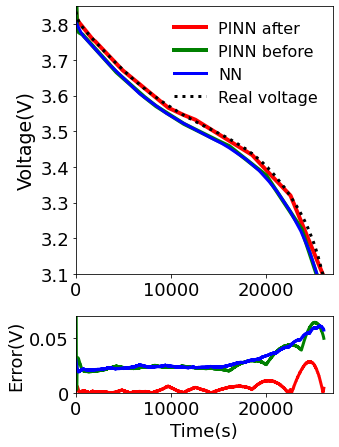

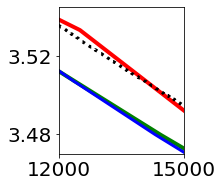

In [21]:
# --------对比4---------------------------------------------------------
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as matplotlib 
import matplotlib.gridspec as gridspec
from tensorflow.keras.callbacks import TensorBoard
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib as matplotlib
%run loaddata2.ipynb
%run mymodel.ipynb
#--------------------------------------------------------------------------
# preliminaries 8个参数
myDtype = 'float32'
inti_data=np.asarray([3.3029034,0.9065826 , 1.2042501 , 5.2634254 , 0.0617640, 0, 0 ,0.94])
#--------------------------------------------------------------------------
# load battery data
batch_size=1
cycle=4
ds_train=load_data8(cycle)
x_test=[];y_test=[]
for item in ds_train:
    x_test=item['x']
    y_test=item['y']
    
time=load_time8(cycle)
jmdDir = "./training_points4"
jmdDir0 = "./training_points0"
weight_path = jmdDir + "/cp.ckpt"
weight_path0 = jmdDir0 + "/cp.ckpt"#之前训练的

model0=create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
model0.load_weights(weight_path0)
voltage0 = model0.predict( x_test).transpose()
err0 = abs(y_test[0,:, 0] - voltage0[:,0])
PINNrmse0= sqrt(mean_squared_error(y_test[0,:, 0],voltage0[:,0]))

modelAfter = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
modelAfter.load_weights(weight_path)
voltageAfter = modelAfter.predict( x_test).transpose()
errAfter = abs(y_test[0,:, 0] - voltageAfter[:,0])
PINNrmse= sqrt(mean_squared_error(y_test[0,:, 0],voltageAfter[:,0]))
# --------------------------------------------------------------------------
#jmdDir2 = "./onlymlp"
#weight_path2 = jmdDir2 + "/cp.ckpt"
#model2.load_weights(weight_path2)

x,y=load_data7(cycle)
x=np.array(x)
x =x[:,np.newaxis]
y1 = model2(x)
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter2 = abs(y - y1)
NNrmse=sqrt(mean_squared_error(y,y1))
# --------------------------------------------------------------------------
print( "PINN after, rmse=%1.1e" % (PINNrmse))
print( "PINN before, rmse=%1.1e" % (PINNrmse0))
print ("NN, rmse=%1.1e" % (NNrmse))


matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rc('font', size=18)
xLB = 0;xUB = 27000
yLB = 3.1;yUB =3.85
fig=plt.figure(num=1,figsize=(5,6.5),tight_layout=True)
fig.clf()

# 设置一个网格(grid)，行数为1，列数为2，宽度比例为3:1
gs = gridspec.GridSpec(nrows=2, ncols=1,  height_ratios=[3.5,1])
ax0 = fig.add_subplot(gs[0, 0])

real = "Real voltage"
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
real = "Real voltage"

plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
plt.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
plt.plot(time,y1, 'b-',label=str2 ,linewidth=3)
plt.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
plt.ylabel('Voltage(V)',fontsize=19,fontweight= 'medium')
plt.legend( facecolor='w',fontsize=16,frameon=False,loc="upper right")
# --------------------------------------------------------------------------
# 增加第二个图
ax1 = fig.add_subplot(gs[1, 0])
xLB = 0;xUB = 27000
yLB = 0;yUB =0.07
strAfter = "PINN after"
str0 = "PINN before"
str2 = "NN"
matplotlib.rc('font', size=16)
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
eAf=abs(voltageAfter[:,0]-y_test[0,:, 0])
e0=abs(voltage0[:,0]-y_test[0,:, 0])
e1=abs(y1[:,0]-y_test[0,:, 0])
plt.plot(time,eAf, 'r-',label=strAfter,linewidth=3)
plt.plot(time, e0, 'g-',label=str0,linewidth=3)
plt.plot(time,e1, 'b-',label="NN",linewidth=3)
plt.ylabel('Error(V)',fontsize=18,fontweight= 'medium')
plt.xlabel('Time(s)',fontsize=18,fontweight= 'medium')
plt.yticks(ticks=[0,0.05],labels=[0,0.05]) 
plt.xticks(ticks=[0,10000,20000],labels=[0,10000,20000])
plt.savefig('duibi-44.png', dpi=500, format='png')
plt.show()
# --------------------------------------------------------------------------

matplotlib.rcParams['mathtext.default'] = 'regular'

xLB = 12000;xUB = 15000
yLB = 3.47;yUB =3.545

fig=plt.figure(num=1,figsize=(3.5,3),tight_layout=True)
fig.clf()

matplotlib.rc('font', size=20)
ax = plt.axes()
plt.xlim(xLB, xUB)
plt.ylim(yLB, yUB)
ax.plot(time, voltageAfter[:,0], 'r-',label=strAfter,linewidth=4)
ax.plot(time, voltage0[:,0], 'g-',label=str0,linewidth=4)
ax.plot(time,y1, 'b-',label=str2 ,linewidth=3)
ax.plot(time, y_test[0,:, 0], 'k:',label=real,linewidth=3)
ax.set_xticks([12000,15000])
ax.set_yticks([3.48,3.52])
plt.savefig('duibi-444.png', dpi=500, format='png')
plt.show()

In [71]:
# --------计算RMSE---------------------------------------------------------
import tensorflow as tf
import numpy as np 
import pandas as pd 
from tensorflow.keras.callbacks import TensorBoard
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
%run loaddata2.ipynb
%run mymodel.ipynb
#--------------------------------------------------------------------------
# preliminaries 8个参数
myDtype = 'float32'
inti_data=np.asarray([3.3029034,0.9065826 , 1.2042501 , 5.2634254 , 0.0617640, 0, 0 ,0.94])
#--------------------------------------------------------------------------
# load battery data
batch_size=1
cycle=2
ds_train=load_data8(cycle)
x_test=[];y_test=[]
for item in ds_train:
    x_test=item['x']
    y_test=item['y']
    
time=load_time8(cycle)
jmdDir = "./training_points2"
jmdDir0 = "./training_points0"
weight_path = jmdDir + "/cp.ckpt"
weight_path0 = jmdDir0 + "/cp.ckpt"#之前训练的

model0=create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
model0.load_weights(weight_path0)
voltage0 = model0.predict( x_test).transpose()
err0 = abs(y_test[0,:, 0] - voltage0[:,0])
PINNrmse0= sqrt(mean_squared_error(y_test[0,:, 0],voltage0[:,0]))

modelAfter = create_PINN(inti_data, batch_size=batch_size, myDtype=myDtype)
modelAfter.load_weights(weight_path)
voltageAfter = modelAfter.predict( x_test).transpose()
errAfter = abs(y_test[0,:, 0] - voltageAfter[:,0])
PINNrmse= sqrt(mean_squared_error(y_test[0,:, 0],voltageAfter[:,0]))
# --------------------------------------------------------------------------
#jmdDir2 = "./onlymlp"
#weight_path2 = jmdDir2 + "/cp.ckpt"
#model2.load_weights(weight_path2)

x,y=load_data7(cycle)
x=np.array(x)
x =x[:,np.newaxis]
y1 = model2(x)
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter2 = abs(y - y1)
NNrmse=sqrt(mean_squared_error(y,y1))
# --------------------------------------------------------------------------
print( "PINN after, rmse=%1.1e" % (PINNrmse))
print( "PINN before, rmse=%1.1e" % (PINNrmse0))
print ("NN, rmse=%1.1e" % (NNrmse))

PINN after, rmse=5.0e-03
PINN before, rmse=1.8e-02
NN, rmse=1.4e-02


In [33]:
#用于与PINN对比,这是用cycle0训练的初始数据
import math
import tensorflow as tf
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.ops import gen_math_ops, array_ops
from tensorflow import reshape
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%run loaddata2.ipynb
import keras

from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape


model2 = keras.Sequential([
layers.Dense(10,input_shape=(None,1),name='MLP1',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.81378984, -1.8503761 , -0.26157856, -1.1937139 ,  1.7237109 ,
         0.09220833,  1.4416839 ,  0.14427362,  1.2345102 ,  0.07999431 ]]),
              bias_initializer=tf.keras.initializers.constant([-0.888477  , -0.4108416 , -0.2635065 , -0.903354  , -0.7844031 ,
       -0.12960482,  0.3194202 , -0.15110472,  0.0354992 , -0.09203645 ])) ,
layers.Dense(10, name='MLP2',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[2.65422463e-01, -1.27041236e-01,  4.52661276e-01,
        -3.29471767e-01,  1.11165857e+00, -1.98310360e-01,
        -1.23113282e-01,  4.81187463e-01,  3.24396700e-01,
         7.72234499e-02],
       [ 6.95701595e-03, -2.68551898e+00, -1.72573641e-01,
        -1.60161126e+00,  1.67411542e+00, -4.11234468e-01,
        -1.51124140e-02,  9.16841507e-01, -3.64710361e-01,
        -3.13260704e-01],
       [-3.26450884e-01, -3.37707192e-01,  3.25038314e-01,
        -3.26060325e-01, -5.47694266e-02,  2.43076250e-01,
        -5.59946239e-01,  5.84894598e-01, -8.95260721e-02,
         3.85180980e-01],
       [-1.05172157e-01, -7.01109052e-01, -3.06323051e-01,
         1.05624102e-01,  9.20509815e-01, -2.77582556e-01,
        -7.68077910e-01,  1.19687915e+00,  1.91779554e-01,
        -2.01685891e-01],
       [-1.94546953e-01,  1.77171099e+00, -6.58261895e-01,
         1.04545212e+00, -1.45300135e-01, -7.86036730e-01,
        -3.49757075e-01,  2.24325728e+00,  3.32891941e-04,
        -4.64577675e-01],
       [ 2.27816492e-01,  5.46442755e-02, -3.02016944e-01,
        -8.67724139e-03, -6.43313289e-01, -2.49221534e-01,
        -6.73341751e-02, -3.15012604e-01,  4.21645045e-01,
        -7.12993145e-02],
       [ 1.54087424e-01,  8.40856135e-01, -1.04970299e-01,
         9.64941084e-01, -3.46117824e-01,  1.57958657e-01,
         3.05982232e-01, -1.40251651e-01, -2.58496910e-01,
        -1.74660590e-02],
       [-5.32724500e-01,  2.70515233e-01,  4.42903638e-02,
         1.88674312e-02, -4.20677811e-02, -6.76956773e-01,
         2.26448983e-01, -2.22733840e-01,  2.78927624e-01,
        -5.00703633e-01],
       [-3.54126781e-01,  7.53291428e-01,  1.43839791e-01,
         8.35071087e-01,  3.24644834e-01, -1.78450823e-01,
        -4.97348368e-01,  7.10153058e-02, -5.45599878e-01,
        -4.28441226e-01],
       [ 4.36499506e-01,  1.29668549e-01,  2.58011580e-01,
        -5.66761289e-03, -6.72495887e-02, -5.69603682e-01,
        -3.28735039e-02, -6.22254387e-02, -1.23597816e-01,
        -4.74325299e-01 ] ]),
              bias_initializer=tf.keras.initializers.constant([-0.04821535,  0.0083283 , -0.08613465,  0.21188577, -0.22363707,
       -0.07900284, -0.2996594 , -1.2863969 , -0.06285694, -0.33686188] ) ),
layers.Dense(10, name='MLP3',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.37891844, -0.49358854, -0.3003814 , -0.00569001, -0.50330913,
        -0.13192394,  0.2088368 , -0.6165178 , -0.14107676,  0.01025125],
       [-0.16690971, -0.0385198 , -0.15828466, -0.11662605, -0.13316566,
         0.02586474, -0.2702447 , -0.2953296 , -0.30750096,  0.69533265],
       [ 0.1286065 , -0.11082339, -0.16675779, -0.5077344 , -0.4005906 ,
        -0.68980557,  0.27726698,  0.33213943,  0.15943344, -0.11523914],
       [ 0.15191704, -0.06985731, -1.0449134 , -0.08227582, -0.24671364,
        -0.55191875, -0.33755833,  0.04693403,  0.21519306,  0.6278719 ],
       [-0.02409043, -0.43792608,  1.0708774 , -0.30255625, -0.2498283 ,
        -0.05430786, -0.18399584, -1.013597  , -0.36124596, -0.6258835 ],
       [-0.27315322,  0.13890049, -0.2731925 ,  0.02014232,  0.15771502,
         0.01904913, -0.25443736,  0.4412189 ,  0.43114555, -0.00876254],
       [ 0.39760613,  0.3669824 , -0.25505087, -0.35657358,  0.33956677,
         0.79111224, -0.33838248,  0.2781069 , -0.277354  , -0.33786467],
       [-0.64984614,  0.49701896,  0.5315713 ,  0.3447873 , -0.13050878,
         0.04216307, -0.01361138, -0.50849354,  0.14061783,  0.5302903 ],
       [-0.39075553,  0.48199713,  0.06720921, -0.04393947,  0.257868  ,
        -0.12013987, -0.08146083,  0.11790187, -0.026393  , -0.22349498],
       [ 0.05492723, -0.02429605, -0.00330691, -0.36589146,  0.02806997,
        -0.16752711, -0.3392403 , -0.16610305, -0.16872872, -0.3170745 ]]),
              bias_initializer=tf.keras.initializers.constant([-0.3664165 , -0.20090523, -0.1269268 , -0.4825628 , -0.35996747,
       -0.512396  ,  0.        , -0.01295314, -0.14460102,  0.07018897 ] ) ),
layers.Dense(10,name='MLP4',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-2.79809237e-02, -4.39540178e-01, -2.44521171e-01,
         2.22087592e-01,  1.50933072e-01,  9.26317051e-02,
        -2.00158060e-01, -4.58130002e-01,  2.95873344e-01,
        -2.48969391e-01],
       [-1.50837153e-01,  4.09051389e-01,  1.94640189e-01,
        -2.31450394e-01, -3.17534000e-01, -2.29275435e-01,
        -5.33144236e-01,  2.86021441e-01,  1.64142907e-01,
         5.43648452e-02],
       [ 8.36630389e-02,  7.00935423e-01,  2.12640926e-01,
        -9.34139937e-02, -1.35934548e-02,  8.57726991e-01,
        -5.20412445e-01, -1.41582415e-01,  6.84211552e-02,
        -1.01144695e+00],
       [ 4.84835058e-01,  1.21539757e-04,  3.36528033e-01,
         1.55718625e-01,  3.06059211e-01,  9.04734671e-01,
        -3.07767898e-01,  1.93653181e-02,  3.40583324e-01,
        -1.09506488e-01],
       [ 2.75329947e-02, -2.18189791e-01, -6.09867275e-02,
         1.13330275e-01,  1.88122034e-01, -3.09002608e-01,
        -4.07197654e-01,  2.66020268e-01, -3.54468286e-01,
        -2.70834804e-01],
       [-9.75600164e-03,  3.05007491e-02,  2.80703127e-01,
         2.16006190e-01, -1.43260568e-01, -1.36660472e-01,
         7.70067573e-02,  4.12402302e-01,  2.06297040e-01,
        -8.90916064e-02],
       [-4.24151003e-01,  1.51204884e-01,  2.23897696e-01,
        -5.19556999e-01, -5.47590971e-01,  7.58175254e-02,
         5.37978172e-01,  2.02502549e-01, -2.84241796e-01,
         2.78558373e-01],
       [-3.59926343e-01, -1.59636706e-01, -4.23954815e-01,
         2.03625821e-02,  3.93948928e-02, -1.12200901e-01,
         2.23679930e-01, -5.06743848e-01, -3.51578981e-01,
        -2.67414823e-02],
       [-3.42407972e-01, -1.24840163e-01,  5.03799856e-01,
         1.03137746e-01,  1.89573318e-01, -1.36372328e-01,
        -4.20136362e-01, -4.95751768e-01, -2.62023300e-01,
        -1.98928639e-01],
       [-2.71414220e-02, -1.79680839e-01,  3.54546487e-01,
         4.22073044e-02, -2.95825213e-01, -6.77095354e-01,
        -1.96686816e+00, -1.55480951e-01, -8.15897822e-01,
         6.21818304e-01]]),
              bias_initializer=tf.keras.initializers.constant([-2.5323722e-01, -5.3174579e-01, -1.1422616e+00, -2.5057191e-01,
       -4.4753474e-01,  3.6228839e-01, -3.8793954e-04, -6.3848370e-01,
       -2.3412429e-01,  2.0942633e-04  ])),
layers.Dense(10,name='MLP5',activation='relu',
              kernel_initializer=tf.keras.initializers.constant([[-0.55930215, -0.42395222,  0.57775015,  0.22310124, -0.12673524,
         0.15844001,  0.09343132, -0.31311208, -0.09185239,  0.23238292],
       [-0.3077209 ,  0.28374428, -1.9871128 ,  0.29858577,  0.33853298,
        -0.05783666,  0.27010322,  0.1356535 , -0.43028197, -0.15311325],
       [-1.2252562 ,  0.4752189 ,  0.34037974, -0.39672935, -0.1920726 ,
        -0.41553307,  0.39073038, -0.63374144,  0.35702658, -0.49460354],
       [ 0.3282492 ,  0.22808532,  0.08905707, -0.1602418 , -0.479924  ,
        -0.17117023, -0.35756573, -0.35328692,  0.08075782, -0.19270127],
       [-0.3857901 , -0.2780655 , -0.19846283,  0.10122564,  0.30246323,
        -0.5634628 ,  0.2811154 , -0.5808906 ,  0.27963826,  0.6968276 ],
       [-0.29226035, -0.4564476 , -0.11949975,  0.60742426, -0.5512995 ,
         0.23557918, -0.5148516 , -0.2485227 ,  0.03042041, -0.18247432],
       [-0.13129295, -0.15905507,  0.2883185 ,  0.25775513,  0.20662178,
        -0.17057125, -0.3603145 ,  0.1910369 ,  0.27252313, -0.3143381 ],
       [-0.10538676, -0.26184934, -0.36741942,  0.03510941,  0.19848548,
         0.32129234,  0.62473047, -0.0075302 , -0.3344901 ,  0.5155041 ],
       [ 0.0794729 , -0.56301916, -0.11961404, -0.01312226,  0.07135432,
         0.36126167,  0.19913624, -0.47039407, -0.54252374,  0.07391509],
       [-0.1974759 , -0.26318407,  0.5592165 , -0.28926572, -0.12443197,
        -0.11298063, -0.7230814 ,  0.11956073, -0.5455087 , -0.20282583 ]]),
              bias_initializer=tf.keras.initializers.constant([0.02406061, -0.04865239,  0.11907359,  0.35612154, -0.61189634,
       -0.6209073 ,  0.0326091 , -0.28735226, -0.10505699,  0.0059619 ])) ,
layers.Dense(1,name='MLP6', kernel_initializer=tf.keras.initializers.constant([[-0.00158347],
       [-0.3295886 ],
       [-0.28909886],
       [ 0.34580392],
       [-0.238162  ],
       [-0.06701415],
       [-0.02859797],
       [ 0.01671782],
       [-0.05230766],
       [ 0.20372626]]),
              bias_initializer=tf.keras.initializers.constant([0.2130326]))])



x,y=load_data9(2)

jmdDir = "./onlymlp"
weight_path = jmdDir + "/cp.ckpt"

model2.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(1e-1), metrics=['mae'])
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_path, monitor='loss',
                                                         verbose=1,save_best_only=True,
                                                         mode='min',save_weights_only=True)
callbacks_list = [ModelCheckpoint]
history = model2.fit(x, y,epochs=300,verbose=1,callbacks=callbacks_list)
y1 = model2(np.array(x))
y1=(y1+1)/2*0.84+3
y=(y+1)/2*0.84+3
errAfter = abs(y - y1)
print("mean_absolute_error:", mean_absolute_error(y,y1))
plt.plot(x,y, 'ob:')
plt.plot(x,y1, 'or:')
plt.show()